## 1. 문제 정의
- 버섯의 특징을 활요해서 독/식용 버섯을 분류
- Decision Tree 시각화, 과대적합 제어

## 2. 데이터 수집


In [3]:
import pandas as pd
data = pd.read_csv("mushroom.csv")

In [7]:
# 데이터 크기 확인용
data.shape

(8124, 23)

## 3. 데이터 전처리
- 결측치, 이상치 확인

In [10]:
# 결측치 확인
# 결측치가 없다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [13]:
# 이상치는 수치형 데이터가 아니기 때문에 확인 불가능
data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [15]:
data['cap-color'].value_counts()

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

## 4. 탐색적 데이터 분석
- 수치형 데이터가 아니여서 생략

## 5. 모델 선택 및 하이퍼 파라미터 튜닝
- 문제와 정답으로 나누기
- 데이터를 수치형으로 바꾸기
- 훈련과 평가로 나누기

In [34]:
X = data.loc[:,'cap-shape':]
y = data.loc[:,'poisonous']

In [35]:
# 데이터를 수치형으로 바꾸기
# Label 인코딩
# 하나의 값에 하나의 숫자를 대입

In [36]:
X1 = X.copy()
# X1 = X 할 경우 주소를 공유하는 또다른 변수를 선언하게 된다

In [37]:
X1['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [38]:
X1["cap-shape"] = X1["cap-shape"].map({"x":0, "f":1, "k":2, "b":3, "s":4, "c":5})
X1["cap-shape"]

0       0
1       0
2       3
3       0
4       0
       ..
8119    2
8120    0
8121    1
8122    2
8123    0
Name: cap-shape, Length: 8124, dtype: int64

#### onehot 인코딩
- 범주형 변수를 표현하는 널리 쓰이는 방법
- 0과 1만을 이용해서 특성을 표현!!
- 범주 종류만큼 특성 자릿수를 만들고 해당하는 데이터는 1 그렇지 않으면 0으로 표시

In [39]:

X2 = X.copy()

In [42]:
X_onehot = pd.get_dummies(X2)
X_onehot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
8121,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False


In [48]:
# 훈련과 평가로 데이터 나누기
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_onehot,y,random_state=25,test_size=0.3)

In [49]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

## 6. 학습

In [50]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

## 7. 평가

In [52]:
# 1.0일 경우 : 데이터가 잘못됐다 싶을 경우
# 1. 데이터 중에서 정답고 ㅏ너무 밀접한 데이터가 있을 것이다.
# 2. 정답을 맞출 수밖에 없는 구조의 데이터
# 0.98일 경우 > 진짜 잘 됐을 수도 있겠다

tree.score(X_train,y_train)

1.0

In [53]:
tree.score(X_test,y_test)

1.0

## 8. 시각화
- graphviz 라이브러리 : Decision Tree 시각화를 도와주는 라이브러리

In [55]:
# Decision Tree: 질문들의 나열
# 어떤 질문들이 있는지를 확인한다.

In [56]:
!pip install graphviz

                                              0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00


In [62]:
# 시스템 환경 변수 설정

import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

In [63]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot',
               class_names=['p','e'],
               feature_names=X_onehot.columns,
               impurity=False, # 불순도 표시 여부
               filled=True) # 노드 안에 색 채우기 여부

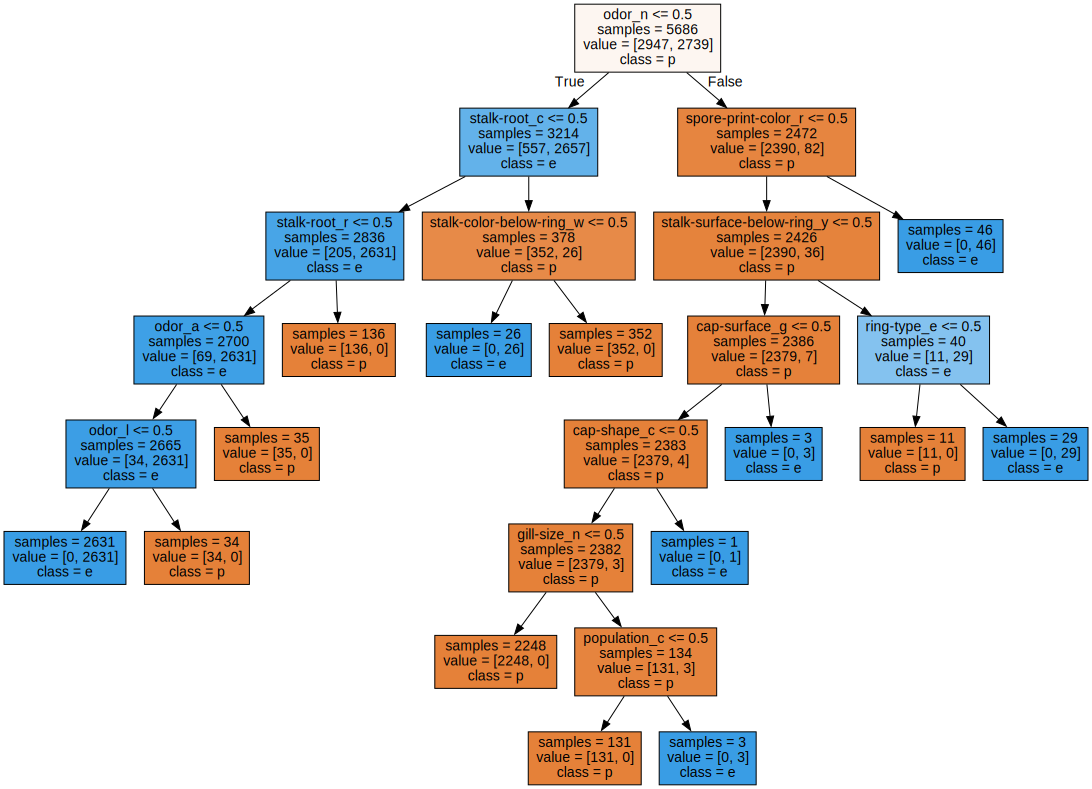

In [64]:
import graphviz

with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [65]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

In [66]:
# 하이퍼 파라미터를 튜닝하면서 과대적합을 해소해보자
# 특성 선택(중요도를 확인) 해보자
tree2=DecisionTreeClassifier(max_depth=1)

In [68]:
#학습
tree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [69]:
#그래프
export_graphviz(tree2, out_file='tree2.dot',
               class_names=['p','e'],
               feature_names=X_onehot.columns,
               impurity=False, # 불순도 표시 여부
               filled=True) # 노드 안에 색 채우기 여부

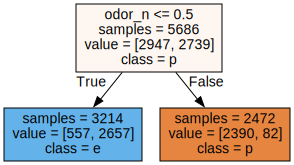

In [70]:
with open('tree2.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [71]:
tree2.score(X_train,y_train)

0.8876187126275061

In [72]:
tree2.score(X_test,y_test)

0.8847415914684167

In [73]:
# 깊이가 3인 모델
tree3=DecisionTreeClassifier(max_depth=3)

In [74]:
tree3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [75]:
export_graphviz(tree3, out_file='tree3.dot',
               class_names=['p','e'],
               feature_names=X_onehot.columns,
               impurity=False, # 불순도 표시 여부
               filled=True) # 노드 안에 색 채우기 여부

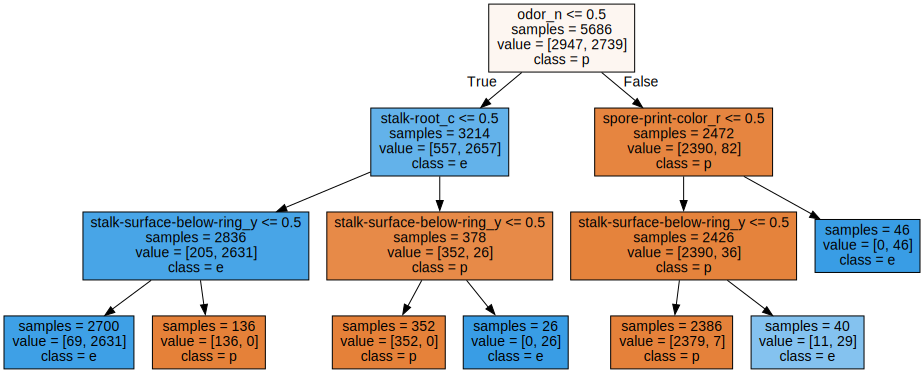

In [76]:
with open('tree3.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [77]:
tree3.score(X_train,y_train)

0.984699261343651

In [78]:
tree3.score(X_test,y_test)

0.9864643150123051

In [79]:
X_train2,X_val,y_train2,y_val = train_test_split(X_train,y_train,random_state=25,test_size=0.3)

### 교차검증 (Cross-validation)

In [88]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [89]:
# (모델, 문제, 정답, cv=데이터 몇 개로 나눌지)
result = cross_val_score(tree2, X_train, y_train, cv=5)
result

array([0.89543058, 0.882146  , 0.87950748, 0.90149516, 0.87950748])

In [90]:
np.mean(result)

0.8876173385083614

### 특성 선택
- tree 모델의 특성 중요도 확인

In [92]:
fi = tree.feature_importances_
fi

array([0.00000000e+00, 7.02356768e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10353792e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.37182941e-02, 0.00000000e+00,
       0.00000000e+00, 2.36448868e-02, 0.00000000e+00, 6.19787062e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.46505639e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.73342250e-01, 0.00000000e+00, 8.66054657e-02,
      

In [97]:
# 모델의 특성 중요도와 특성의 이름을 이용하여 데이터프레임 생성
importance_df = pd.DataFrame(fi,index=X_train.columns, columns=['feature_name'])
importance_df

,feature_name
cap-shape_b,0.000000
cap-shape_c,0.000702
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [101]:
importance_df.sort_values(by = 'feature_name',ascending = False).head(10)

,feature_name
odor_n,0.619787
stalk-root_c,0.173342
stalk-root_r,0.086605
spore-print-color_r,0.030864
odor_a,0.023718
odor_l,0.023645
stalk-color-below-ring_w,0.017055
stalk-surface-below-ring_y,0.014449
ring-type_e,0.005618
cap-surface_g,0.002104


### Greed Search 다양한 하이퍼파라미터 조정


In [106]:
tree4 = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8, min_samples_leaf=30)
#다양한 하이퍼파라미터를 직접 돌리긴 복잡!!! => 그리드 서치!!

In [107]:
from sklearn.model_selection import GridSearchCV # CV = Cross-validation 

In [112]:
# 궁금한 파라미터 값들 작성!! (딕셔너리)
params = {'max_depth' : [3,4,5],
        'max_leaf_nodes' : [5,7,9],
         'min_samples_leaf' : [15,30,45]}

In [113]:
# 모델, 궁금한 파라미터, cv갯수
grid = GridSearchCV(tree,params,cv=3)

In [114]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'max_leaf_nodes': [5, 7, 9],
                         'min_samples_leaf': [15, 30, 45]})

In [115]:
# 가장 좋은 조합의 점수!
grid.best_score_

0.9964823411969466

In [116]:
# 가장 좋은 점수의 매개변수 조합!
grid.best_params_

{'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_leaf': 15}

In [119]:
# 가장 좋은 모델!
# 다시 학습시킬 필요가 없다!
best_model = grid.best_estimator_
best_model

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9, min_samples_leaf=15)

In [120]:
best_model.predict(X_test)

array(['e', 'p', 'e', ..., 'p', 'e', 'e'], dtype=object)

In [ ]:
# 앙상블 : 성능 좋은 모델 > 느리다